In [0]:
! pip install nltk
! pip install mtcnn
! pip install cv2

     |████████████████████████████████| 2.3MB 5.0MB/s 
     |████████████████████████████████| 28.3MB 56.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [41]:
import os
import nltk
import keras
import numpy as np
import cv2
import regex as re

from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# **Imagem com a qual estamos trabalhando**

# **Comparando modelos para classificar a imagem**

**Classificação usando VGG16**

In [0]:
labels_set = set(labels_so_far)
labels_set

In [20]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}
modelEmotion = load_model("model/model_v6_23.hdf5")
#modelEmotion = load_model("drive/My Drive/Materias/HCML/tp/model/model.h5")

path = 'fairface-img-margin125-trainval/train/'
images_list = os.listdir(path)

dictResult = {}
i = 0

for file in images_list[:1000]:
    nameFile = path+file
    
    if i % 100 == 0:
        print("{}/{}- file:{}".format(i,len(images_list),nameFile))

    face_image  = cv2.imread(nameFile)
    face_image = cv2.resize(face_image, (48,48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

    predicted_class = np.argmax(modelEmotion.predict(face_image))
    label_map = dict((v,k) for k,v in emotion_dict.items()) 
    predicted_label = label_map[predicted_class]

    if predicted_label in dictResult:
        dictResult[predicted_label] += 1
    else:
        dictResult.update({predicted_label: 1})
    

    i += 1

print(dictResult)
# ALL: {'Angry': 24002, 'Fear': 48732, 'Surprise': 13403, 'Sad': 440, 'Happy': 126, 'Neutral': 41}
# 1000 : {'Angry': 270, 'Fear': 563, 'Surprise': 159, 'Sad': 7, 'Happy': 1}

0/86744- file:fairface-img-margin125-trainval/train/1.jpg
100/86744- file:fairface-img-margin125-trainval/train/10088.jpg
200/86744- file:fairface-img-margin125-trainval/train/10178.jpg
300/86744- file:fairface-img-margin125-trainval/train/10268.jpg
400/86744- file:fairface-img-margin125-trainval/train/10358.jpg
500/86744- file:fairface-img-margin125-trainval/train/10448.jpg
600/86744- file:fairface-img-margin125-trainval/train/10538.jpg
700/86744- file:fairface-img-margin125-trainval/train/10628.jpg
800/86744- file:fairface-img-margin125-trainval/train/10718.jpg
900/86744- file:fairface-img-margin125-trainval/train/10808.jpg
{'Angry': 270, 'Fear': 563, 'Surprise': 159, 'Sad': 7, 'Happy': 1}


In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.load_weights('model/model.h5')   

path = 'fairface-img-margin125-trainval/train/'
images_list = os.listdir(path)

dictResult = {}
resultImage = {}
i = 0

for file in images_list:
    nameFile = path+file
    
    if i % 100 == 0:
        print("{}/{}- file:{}".format(i,len(images_list),nameFile))

    face_image  = cv2.imread(nameFile)
    face_image = cv2.resize(face_image, (48,48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

    predicted_class = np.argmax(model.predict(face_image))
    label_map = dict((v,k) for k,v in emotion_dict.items()) 
    predicted_label = label_map[predicted_class]

    if predicted_label in dictResult:
        dictResult[predicted_label] += 1
    else:
        dictResult.update({predicted_label: 1})
        
    resultImage.update({file: predicted_label})
    

    i += 1

print(dictResult)
# ALL: {'Angry': 9376, 'Sad': 17019, 'Happy': 24401, 'Fear': 22127, 'Disgust': 39, 'Neutral': 8428, 'Surprise': 5354}
# 1000 : {'Angry': 109, 'Sad': 217, 'Happy': 274, 'Fear': 246, 'Disgust': 1, 'Neutral': 90, 'Surprise': 63}

0/86744- file:fairface-img-margin125-trainval/train/1.jpg
100/86744- file:fairface-img-margin125-trainval/train/10088.jpg
200/86744- file:fairface-img-margin125-trainval/train/10178.jpg
300/86744- file:fairface-img-margin125-trainval/train/10268.jpg
400/86744- file:fairface-img-margin125-trainval/train/10358.jpg
500/86744- file:fairface-img-margin125-trainval/train/10448.jpg
600/86744- file:fairface-img-margin125-trainval/train/10538.jpg
700/86744- file:fairface-img-margin125-trainval/train/10628.jpg
800/86744- file:fairface-img-margin125-trainval/train/10718.jpg
900/86744- file:fairface-img-margin125-trainval/train/10808.jpg
1000/86744- file:fairface-img-margin125-trainval/train/10899.jpg
1100/86744- file:fairface-img-margin125-trainval/train/10989.jpg
1200/86744- file:fairface-img-margin125-trainval/train/11078.jpg
1300/86744- file:fairface-img-margin125-trainval/train/11168.jpg
1400/86744- file:fairface-img-margin125-trainval/train/11258.jpg
1500/86744- file:fairface-img-margin125-t

12600/86744- file:fairface-img-margin125-trainval/train/21338.jpg
12700/86744- file:fairface-img-margin125-trainval/train/21428.jpg
12800/86744- file:fairface-img-margin125-trainval/train/21518.jpg
12900/86744- file:fairface-img-margin125-trainval/train/21608.jpg
13000/86744- file:fairface-img-margin125-trainval/train/21699.jpg
13100/86744- file:fairface-img-margin125-trainval/train/21789.jpg
13200/86744- file:fairface-img-margin125-trainval/train/21879.jpg
13300/86744- file:fairface-img-margin125-trainval/train/21969.jpg
13400/86744- file:fairface-img-margin125-trainval/train/22058.jpg
13500/86744- file:fairface-img-margin125-trainval/train/22148.jpg
13600/86744- file:fairface-img-margin125-trainval/train/22238.jpg
13700/86744- file:fairface-img-margin125-trainval/train/22328.jpg
13800/86744- file:fairface-img-margin125-trainval/train/22418.jpg
13900/86744- file:fairface-img-margin125-trainval/train/22508.jpg
14000/86744- file:fairface-img-margin125-trainval/train/22599.jpg
14100/8674

25100/86744- file:fairface-img-margin125-trainval/train/32589.jpg
25200/86744- file:fairface-img-margin125-trainval/train/32679.jpg
25300/86744- file:fairface-img-margin125-trainval/train/32769.jpg
25400/86744- file:fairface-img-margin125-trainval/train/32859.jpg
25500/86744- file:fairface-img-margin125-trainval/train/32949.jpg
25600/86744- file:fairface-img-margin125-trainval/train/33038.jpg
25700/86744- file:fairface-img-margin125-trainval/train/33128.jpg
25800/86744- file:fairface-img-margin125-trainval/train/33218.jpg
25900/86744- file:fairface-img-margin125-trainval/train/33308.jpg
26000/86744- file:fairface-img-margin125-trainval/train/33399.jpg
26100/86744- file:fairface-img-margin125-trainval/train/33489.jpg
26200/86744- file:fairface-img-margin125-trainval/train/33579.jpg
26300/86744- file:fairface-img-margin125-trainval/train/33669.jpg
26400/86744- file:fairface-img-margin125-trainval/train/33759.jpg
26500/86744- file:fairface-img-margin125-trainval/train/33849.jpg
26600/8674

37600/86744- file:fairface-img-margin125-trainval/train/43839.jpg
37700/86744- file:fairface-img-margin125-trainval/train/43929.jpg
37800/86744- file:fairface-img-margin125-trainval/train/44018.jpg
37900/86744- file:fairface-img-margin125-trainval/train/44108.jpg
38000/86744- file:fairface-img-margin125-trainval/train/44199.jpg
38100/86744- file:fairface-img-margin125-trainval/train/44289.jpg
38200/86744- file:fairface-img-margin125-trainval/train/44379.jpg
38300/86744- file:fairface-img-margin125-trainval/train/44469.jpg
38400/86744- file:fairface-img-margin125-trainval/train/44559.jpg
38500/86744- file:fairface-img-margin125-trainval/train/44649.jpg
38600/86744- file:fairface-img-margin125-trainval/train/44739.jpg
38700/86744- file:fairface-img-margin125-trainval/train/44829.jpg
38800/86744- file:fairface-img-margin125-trainval/train/44919.jpg
38900/86744- file:fairface-img-margin125-trainval/train/45008.jpg
39000/86744- file:fairface-img-margin125-trainval/train/45099.jpg
39100/8674

50100/86744- file:fairface-img-margin125-trainval/train/55089.jpg
50200/86744- file:fairface-img-margin125-trainval/train/55179.jpg
50300/86744- file:fairface-img-margin125-trainval/train/55269.jpg
50400/86744- file:fairface-img-margin125-trainval/train/55359.jpg
50500/86744- file:fairface-img-margin125-trainval/train/55449.jpg
50600/86744- file:fairface-img-margin125-trainval/train/55539.jpg
50700/86744- file:fairface-img-margin125-trainval/train/55629.jpg
50800/86744- file:fairface-img-margin125-trainval/train/55719.jpg
50900/86744- file:fairface-img-margin125-trainval/train/55809.jpg
51000/86744- file:fairface-img-margin125-trainval/train/559.jpg
51100/86744- file:fairface-img-margin125-trainval/train/5599.jpg
51200/86744- file:fairface-img-margin125-trainval/train/56079.jpg
51300/86744- file:fairface-img-margin125-trainval/train/56169.jpg
51400/86744- file:fairface-img-margin125-trainval/train/56259.jpg
51500/86744- file:fairface-img-margin125-trainval/train/56349.jpg
51600/86744- 

62600/86744- file:fairface-img-margin125-trainval/train/66339.jpg
62700/86744- file:fairface-img-margin125-trainval/train/66429.jpg
62800/86744- file:fairface-img-margin125-trainval/train/66519.jpg
62900/86744- file:fairface-img-margin125-trainval/train/66609.jpg
63000/86744- file:fairface-img-margin125-trainval/train/667.jpg
63100/86744- file:fairface-img-margin125-trainval/train/6679.jpg
63200/86744- file:fairface-img-margin125-trainval/train/6688.jpg
63300/86744- file:fairface-img-margin125-trainval/train/6697.jpg
63400/86744- file:fairface-img-margin125-trainval/train/67059.jpg
63500/86744- file:fairface-img-margin125-trainval/train/67149.jpg
63600/86744- file:fairface-img-margin125-trainval/train/67239.jpg
63700/86744- file:fairface-img-margin125-trainval/train/67329.jpg
63800/86744- file:fairface-img-margin125-trainval/train/67419.jpg
63900/86744- file:fairface-img-margin125-trainval/train/67509.jpg
64000/86744- file:fairface-img-margin125-trainval/train/676.jpg
64100/86744- file

75100/86744- file:fairface-img-margin125-trainval/train/7759.jpg
75200/86744- file:fairface-img-margin125-trainval/train/7768.jpg
75300/86744- file:fairface-img-margin125-trainval/train/7777.jpg
75400/86744- file:fairface-img-margin125-trainval/train/7786.jpg
75500/86744- file:fairface-img-margin125-trainval/train/7795.jpg
75600/86744- file:fairface-img-margin125-trainval/train/78039.jpg
75700/86744- file:fairface-img-margin125-trainval/train/78129.jpg
75800/86744- file:fairface-img-margin125-trainval/train/78219.jpg
75900/86744- file:fairface-img-margin125-trainval/train/78309.jpg
76000/86744- file:fairface-img-margin125-trainval/train/784.jpg
76100/86744- file:fairface-img-margin125-trainval/train/7849.jpg
76200/86744- file:fairface-img-margin125-trainval/train/7858.jpg
76300/86744- file:fairface-img-margin125-trainval/train/7867.jpg
76400/86744- file:fairface-img-margin125-trainval/train/7876.jpg
76500/86744- file:fairface-img-margin125-trainval/train/7885.jpg
76600/86744- file:fair

In [ ]:
#{'Angry': 9376, 'Sad': 17019, 'Happy': 24401, 'Fear': 22127, 'Disgust': 39, 'Neutral': 8428, 'Surprise': 5354}
#{'Angry': 24002, 'Fear': 48732, 'Surprise': 13403, 'Sad': 440, 'Happy': 126, 'Neutral': 41}

In [70]:
# Dataframe of labels
df = pd.read_csv('label/fairface_label_train.csv')
df.loc[:,"file"] = [x.replace('train/',"") for x in df.loc[:,"file"]]

data = {'file':list(resultImage.keys()), 'emotions':list(resultImage.values())}

# Dataframe of result
df_result = pd.DataFrame(data=data, columns=['file', 'emotions'])

df = pd.merge(df_result, df, how="outer", on="file")
df.head(10)

,file,emotions,age,gender,race,service_test
0,1.jpg,Angry,50-59,Male,East Asian,True
1,10.jpg,Sad,30-39,Male,Middle Eastern,False
2,100.jpg,Happy,20-29,Female,East Asian,False
3,1000.jpg,Fear,30-39,Male,White,False
4,10000.jpg,Happy,50-59,Male,White,False
5,10001.jpg,Disgust,more than 70,Female,Latino_Hispanic,False
6,10002.jpg,Happy,30-39,Male,White,True
7,10003.jpg,Happy,3-9,Male,East Asian,False
8,10004.jpg,Fear,40-49,Male,Indian,False
9,10005.jpg,Fear,20-29,Male,Southeast Asian,False


In [103]:
gender = df.groupby(["emotions", "gender"], as_index=False).sum()
gender.columns = ["emotions", "gender", "count"]
gender

,emotions,gender,count
0,Angry,Female,1933.0
1,Angry,Male,2413.0
2,Disgust,Female,9.0
3,Disgust,Male,8.0
4,Fear,Female,5162.0
5,Fear,Male,4950.0
6,Happy,Female,5704.0
7,Happy,Male,5767.0
8,Neutral,Female,2038.0
9,Neutral,Male,1898.0


<BarContainer object of 7 artists>

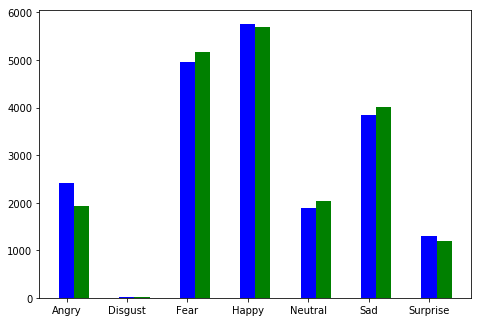

In [200]:
emotions_list = [""]
emotions_list[1:] = males['emotions'].unique()
male = list(gender.query('gender=="Male"')['count'])
female = list(gender.query('gender=="Female"')['count'])

X = np.arange(7)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xticklabels(labels =emotions_list, minor=False)

ax.bar(X + 0.00, male, color = 'b', width = 0.25)
ax.bar(X + 0.25, female, color = 'g', width = 0.25)
# ax.bar.xticks(labels = emotions_list)

In [202]:
race = df.groupby(["emotions", "race"], as_index=False).sum()
race.columns = ["emotions", "race", "count"]
race.head(10)

,emotions,race,count
0,Angry,Black,805.0
1,Angry,East Asian,508.0
2,Angry,Indian,625.0
3,Angry,Latino_Hispanic,657.0
4,Angry,Middle Eastern,578.0
5,Angry,Southeast Asian,551.0
6,Angry,White,622.0
7,Disgust,Black,3.0
8,Disgust,East Asian,1.0
9,Disgust,Indian,3.0


<BarContainer object of 7 artists>

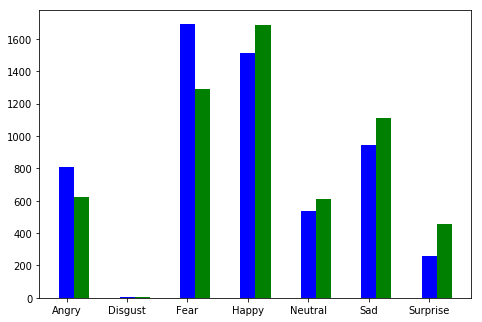

In [204]:
emotions_list = [""]
emotions_list[1:] = race['emotions'].unique()
black = list(race.query('race=="Black"')['count'])
whithe = list(race.query('race=="White"')['count'])

X = np.arange(len(male))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xticklabels(labels =emotions_list, minor=False)

ax.bar(X + 0.00, black, color = 'b', width = 0.25)
ax.bar(X + 0.25, whithe, color = 'g', width = 0.25)
# ax.bar.xticks(labels = emotions_list)